In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_excel('/home/sola/Documents/FIRST FILE/First Work/top5-players24-25.xlsx')
pd.set_option('Display.max_columns',37)

In [3]:
                                                                            #PREMIER LEAGUE
PL = data.groupby(['Comp'])
pldf = PL.get_group('eng Premier League')
fltr = (pldf['Gls'] != 0)
only_goal_scorers_pl = pldf.loc[fltr].sort_values(by=['Squad'],ascending=True).loc[:,['Squad','Player','Nation','Age','Pos','Min','Born','Gls','Ast','G+A']]

                                                                            #LA LIGA 
LA_LIGA = data.groupby(['Comp'])
lldf = LA_LIGA.get_group('es La Liga')
fltr = (lldf['Gls'] != 0)
only_goal_scorers_ll = lldf.loc[fltr].sort_values(by=['Squad'],ascending=True).loc[:,['Squad','Player','Nation','Age','Pos','Min','Born','Gls','Ast','G+A']]

                                                                            #SERIE A
SERIE_A = data.groupby(['Comp'])
sadf = SERIE_A.get_group('it Serie A')
fltr = (sadf['Gls'] != 0)
only_goal_scorers_sa = sadf.loc[fltr].sort_values(by=['Squad'],ascending=True).loc[:,['Squad','Player','Nation','Age','Pos','Min','Born','Gls','Ast','G+A']]

                                                                            #Bundesliga
BUN = data.groupby(['Comp'])
bldf = BUN.get_group('de Bundesliga')
fltr = (bldf['Gls'] != 0)
only_goal_scorers_bl = bldf.loc[fltr].sort_values(by=['Squad'],ascending=True).loc[:,['Squad','Player','Nation','Age','Pos','Min','Born','Gls','Ast','G+A']]

                                                                            #Ligue 1
LU = data.groupby(['Comp'])
ludf = LU.get_group('eng Premier League')
fltr = (ludf['Gls'] != 0)
only_goal_scorers_lu = ludf.loc[fltr].sort_values(by=['Squad'],ascending=True).loc[:,['Squad','Player','Nation','Age','Pos','Min','Born','Gls','Ast','G+A']]


#Calculate The Total Of Team Statistics
def Team_Stats(df, team=None):
    """
    Display team statistics for Premier League 2024-25 season
    Creates a new DataFrame with team players and their Goals + Assists
    
    Parameters:
    df: DataFrame containing player data
    team: Team name (string). If None, prompts user for input
    
    Returns:
    DataFrame with team statistics including totals row
    """
    if team == None:
        team = input('Enter Your Specified Team: ')
    
    # Filter for the specified team
    fltr = (df['Squad'] == team)
    team_data = df[fltr].copy()
    
    # Check if team exists in the dataset
    if team_data.empty:
        print(f'Your Team "{team}" has not scored any goals or made any assists this season, or the team name is incorrect.')
        print(f'\nAvailable teams: {sorted(df["Squad"].unique())}')
        return None
    
    # Create new DataFrame with relevant columns
    team_stats = team_data[['Player', 'Pos', 'Age', 'Gls', 'Ast', 'G+A']].copy()
    
    # Sort by G+A
    team_stats = team_stats.sort_values('G+A', ascending=False).reset_index(drop=True)
    
    # Calculate totals
    total_goals = team_stats['Gls'].sum()
    total_assists = team_stats['Ast'].sum()
    total_ga = team_stats['G+A'].sum()
    
    # Create totals row
    totals_row = pd.DataFrame({
        'Player': ['TEAM TOTAL'],
        'Pos': [''],
        'Age': [''],
        'Gls': [total_goals],
        'Ast': [total_assists],
        'G+A': [total_ga]
    })
    
    # Append totals row to the DataFrame
    team_stats = pd.concat([team_stats, totals_row], ignore_index=True)
    
    # Display header
    print(f'\n{"="*60}')
    print(f'{team.upper()} - 2024/25 SEASON STATISTICS')
    print(f'{"="*60}')
    print(f'Total Goals: {total_goals} | Total Assists: {total_assists} | Total G+A: {total_ga}')
    print(f'Total players with G+A: {len(team_data)}')
    print(f'{"="*60}\n')
    
    return team_stats
Team_Stats(only_goal_scorers_pl,'Liverpool').rename(lambda x: x+1)

# Example usage:
# team_df = Team_Stats(df)  # Will prompt for team name
# team_df = Team_Stats(df, 'Arsenal')  # Directly specify team
# team_df = Team_Stats(df, 'Wolves')  # Another example
# 
# # Display the DataFrame
# print(team_df)


LIVERPOOL - 2024/25 SEASON STATISTICS
Total Goals: 85 | Total Assists: 57 | Total G+A: 142
Total players with G+A: 12



,Player,Pos,Age,Gls,Ast,G+A
1,Mohamed Salah,FW,32.0,29,18,47
2,Luis Díaz,FW,27.0,13,5,18
3,Cody Gakpo,FW,25.0,10,4,14
4,Dominik Szoboszlai,MF,23.0,6,6,12
5,Alexis Mac Allister,MF,25.0,5,5,10
6,Diogo Jota,FW,27.0,6,3,9
7,Trent Alexander-Arnold,DF,25.0,3,6,9
8,Darwin Núñez,FW,25.0,5,2,7
9,Curtis Jones,"MF,DF",23.0,3,3,6
10,Virgil van Dijk,DF,33.0,3,1,4


In [12]:
data.sort_values(by='G+A',ascending=False).head(20).loc[:,['Squad','Player','Nation','Age','Pos','Min','Gls','Ast','G+A']].rename(lambda x: x+1)

,Squad,Player,Nation,Age,Pos,Min,Gls,Ast,G+A
2305,Liverpool,Mohamed Salah,eg EGY,32.0,FW,3371,29,18,47
1318,Bayern Munich,Harry Kane,eng ENG,31.0,FW,2381,26,9,35
1692,Real Madrid,Kylian Mbappé,fr FRA,25.0,FW,2907,31,3,34
2202,Atalanta,Mateo Retegui,it ITA,25.0,FW,2383,25,8,33
1484,Barcelona,Robert Lewandowski,pl POL,35.0,FW,2667,27,2,29
1220,Newcastle Utd,Alexander Isak,se SWE,24.0,FW,2756,23,6,29
1694,Brentford,Bryan Mbeumo,cm CMR,24.0,FW,3414,20,7,27
2178,Barcelona,Raphinha,br BRA,27.0,"FW,MF",2839,18,9,27
698,Paris S-G,Ousmane Dembélé,fr FRA,27.0,FW,1730,21,6,27
1961,Bayern Munich,Michael Olise,fr FRA,22.0,"FW,MF",2334,12,15,27


In [11]:
#PLotting Each leaguees'team stats
def plot_team_stats(df, team=None):
    """
    Plot Premier League team statistics for 2024-25 season
    Creates visualizations for Goals, Assists, and G+A
    
    Parameters:
    df: DataFrame containing player data
    team: Team name (string). If None, prompts user for input
    """
    if team == None:
        team = input('Enter Your Specified Team: ')
    
    # Filter for the specified team
    fltr = (df['Squad'] == team)
    team_data = df[fltr].copy()
    
    # Check if team exists in the dataset
    if team_data.empty:
        print(f'Your Team "{team}" has not scored any goals or made any assists this season, or the team name is incorrect.')
        print(f'\nAvailable teams: {sorted(df["Squad"].unique())}')
        return
    
    # Sort by G+A and get top 10 players
    team_sorted = team_data.sort_values('G+A', ascending=False).head(10)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{team.upper()} - 2024/25 Season Statistics', fontsize=18, fontweight='bold')
    
    # 1. Goals + Assists Bar Chart (Top 10)
    ax1 = axes[0, 0]
    colors = plt.cm.viridis(range(len(team_sorted)))
    ax1.barh(team_sorted['Player'], team_sorted['G+A'], color=colors)
    ax1.set_xlabel('Goals + Assists', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Player', fontsize=12, fontweight='bold')
    ax1.set_title('Top 10 Players by G+A', fontsize=14, fontweight='bold')
    ax1.invert_yaxis()
    for i, v in enumerate(team_sorted['G+A']):
        ax1.text(v + 0.1, i, str(v), va='center', fontweight='bold')
    
    # 2. KDE Plot - Goals vs Assists Distribution
    ax2 = axes[0, 1]
    
    # Only create KDE if we have enough data points
    if len(team_data) >= 3:
        try:
            sns.kdeplot(data=team_data, x='Gls', y='Ast', 
                       fill=True, cmap='YlOrRd', alpha=0.6, ax=ax2)
            # Overlay scatter plot
            scatter = ax2.scatter(team_data['Gls'], team_data['Ast'], 
                                s=team_data['G+A']*30, alpha=0.8, 
                                c=team_data['G+A'], cmap='coolwarm', 
                                edgecolors='black', linewidth=1)
            plt.colorbar(scatter, ax=ax2, label='G+A')
        except:
            # Fallback to scatter if KDE fails
            scatter = ax2.scatter(team_data['Gls'], team_data['Ast'], 
                                s=team_data['G+A']*30, alpha=0.6, 
                                c=team_data['G+A'], cmap='coolwarm')
            plt.colorbar(scatter, ax=ax2, label='G+A')
    else:
        scatter = ax2.scatter(team_data['Gls'], team_data['Ast'], 
                            s=team_data['G+A']*30, alpha=0.6, 
                            c=team_data['G+A'], cmap='coolwarm')
        plt.colorbar(scatter, ax=ax2, label='G+A')
    
    ax2.set_xlabel('Goals', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Assists', fontsize=12, fontweight='bold')
    ax2.set_title('Goals vs Assists Distribution (KDE)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Add player names to top contributors
    top_5 = team_data.nlargest(5, 'G+A')
    for _, row in top_5.iterrows():
        ax2.annotate(row['Player'], (row['Gls'], row['Ast']), 
                    fontsize=9, alpha=0.7, xytext=(5, 5), 
                    textcoords='offset points', fontweight='bold')
    
    # 3. Goals vs Assists Comparison (Top 10)
    ax3 = axes[1, 0]
    x = range(len(team_sorted))
    width = 0.35
    ax3.bar([i - width/2 for i in x], team_sorted['Gls'], width, 
           label='Goals', color='#FF6B6B', alpha=0.8)
    ax3.bar([i + width/2 for i in x], team_sorted['Ast'], width, 
           label='Assists', color='#4ECDC4', alpha=0.8)
    ax3.set_xlabel('Player', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax3.set_title('Goals vs Assists Breakdown (Top 10)', fontsize=14, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(team_sorted['Player'], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Team Summary Stats
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    # Calculate summary statistics
    total_goals = team_data['Gls'].sum()
    total_assists = team_data['Ast'].sum()
    total_ga = team_data['G+A'].sum()
    avg_ga = team_data['G+A'].mean()
    top_scorer = team_data.loc[team_data['Gls'].idxmax()]
    top_assister = team_data.loc[team_data['Ast'].idxmax()]
    
    summary_text = f"""
    TEAM SUMMARY STATISTICS
    {'='*50}
    
    Total Goals:           {total_goals}
    Total Assists:         {total_assists}
    Total G+A:             {total_ga}
    Average G+A per Player: {avg_ga:.2f}
    
    {'='*50}
    
    Top Scorer:
    {top_scorer['Player']} - {top_scorer['Gls']} goals
    
    Top Assister:
    {top_assister['Player']} - {top_assister['Ast']} assists
    
    Most Productive Player:
    {team_data.loc[team_data['G+A'].idxmax()]['Player']} - {team_data['G+A'].max()} G+A
    
    {'='*50}
    
    Total Players with G+A: {len(team_data)}
    """
    
    ax4.text(0.1, 0.5, summary_text, fontsize=12, family='monospace',
            verticalalignment='center', bbox=dict(boxstyle='round', 
            facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.show()
    plot_team_stats(only_goal_scorers_pl,'Arsenal')


# Example usage:
# plot_team_stats(df, 'Arsenal')For df: there is only_goal_scorers_pl/bl/ll/lu/sa
# plot_team_stats(df, 'Wolves')
# plot_team_stats(df)  # Will prompt for team name


/tmp/ipykernel_9399/405073383.py:155: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.96])


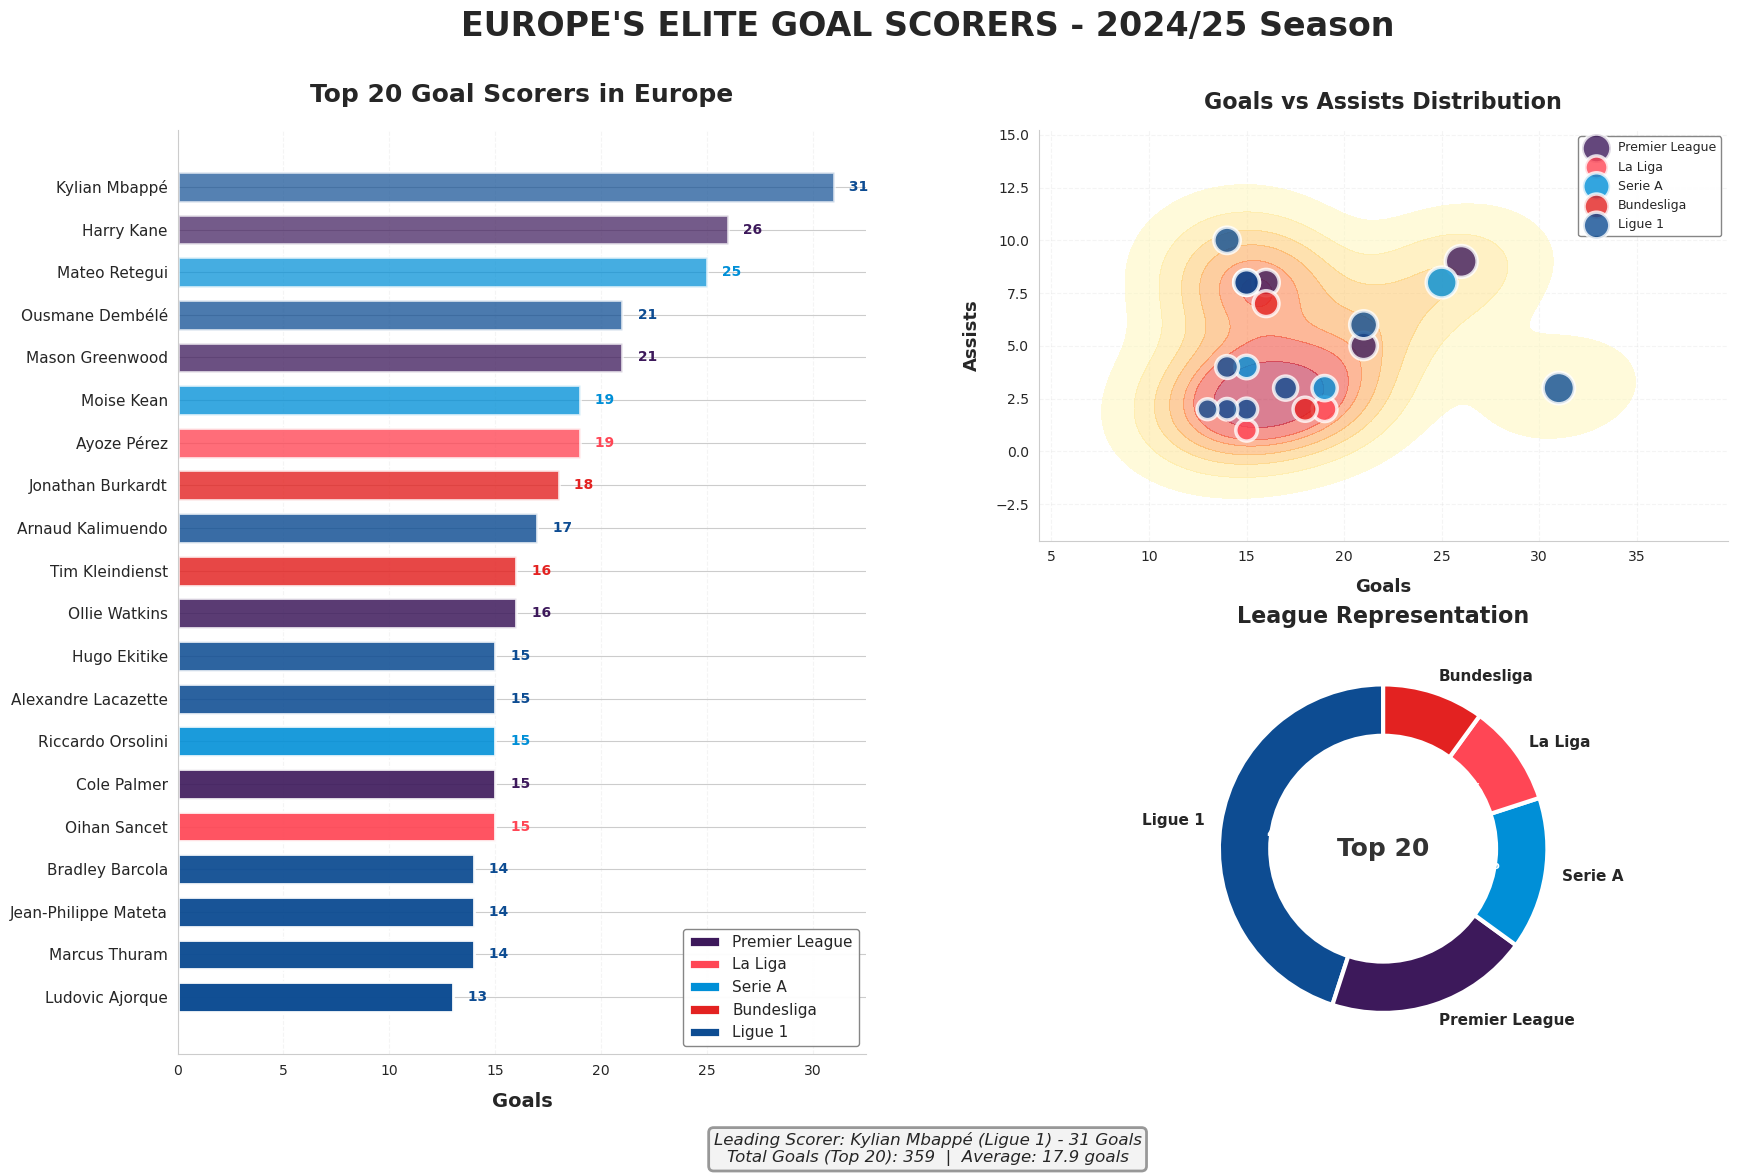

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,...,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,League
1692,1692,Kylian Mbappé,fr FRA,FW,Real Madrid,es La Liga,25.0,1998.0,34,34,2907,32.3,31,3,34,24,7,9,...,25.9,18.6,7.7,26.3,150,140,386,0.96,0.09,1.05,0.74,0.84,0.80,0.24,1.04,0.58,0.81,Ligue 1
1318,1318,Harry Kane,eng ENG,FW,Bayern Munich,de Bundesliga,31.0,1993.0,31,28,2381,26.5,26,9,35,17,9,9,...,20.3,13.3,5.3,18.6,29,97,143,0.98,0.34,1.32,0.64,0.98,0.77,0.20,0.97,0.50,0.70,Premier League
2202,2202,Mateo Retegui,it ITA,FW,Atalanta,it Serie A,25.0,1999.0,36,32,2383,26.5,25,8,33,21,4,5,...,18.9,14.9,4.9,19.8,21,46,199,0.94,0.30,1.25,0.79,1.10,0.71,0.18,0.90,0.56,0.75,Serie A
698,698,Ousmane Dembélé,fr FRA,FW,Paris S-G,fr Ligue 1,27.0,1997.0,29,20,1730,19.2,21,6,27,20,1,1,...,16.6,15.8,8.2,24.0,127,137,252,1.09,0.31,1.40,1.04,1.35,0.86,0.43,1.29,0.82,1.25,Ligue 1
1061,1061,Mason Greenwood,eng ENG,"FW,MF",Marseille,fr Ligue 1,22.0,2001.0,34,32,2804,31.2,21,5,26,14,7,9,...,16.3,9.1,5.7,14.8,126,157,295,0.67,0.16,0.83,0.45,0.61,0.52,0.18,0.71,0.29,0.48,Premier League
1331,1331,Moise Kean,it ITA,FW,Fiorentina,it Serie A,24.0,2000.0,32,31,2704,30.0,19,3,22,18,1,2,...,19.4,17.9,1.9,19.7,42,26,143,0.63,0.10,0.73,0.60,0.70,0.65,0.06,0.71,0.59,0.66,Serie A
2089,2089,Ayoze Pérez,es ESP,FW,Villarreal,es La Liga,31.0,1993.0,30,22,1970,21.9,19,2,21,19,0,0,...,12.7,12.7,3.0,15.7,59,73,124,0.87,0.09,0.96,0.87,0.96,0.58,0.13,0.71,0.58,0.71,La Liga
416,416,Jonathan Burkardt,de GER,FW,Mainz 05,de Bundesliga,24.0,2000.0,29,28,2109,23.4,18,2,20,16,2,2,...,14.8,13.2,3.1,16.3,32,42,157,0.77,0.09,0.85,0.68,0.77,0.63,0.13,0.76,0.56,0.70,Bundesliga
1305,1305,Arnaud Kalimuendo,fr FRA,"FW,MF",Rennes,fr Ligue 1,22.0,2002.0,33,31,2578,28.6,17,3,20,12,5,8,...,14.9,8.9,2.0,10.9,50,72,167,0.59,0.10,0.70,0.42,0.52,0.52,0.07,0.59,0.31,0.38,Ligue 1
1365,1365,Tim Kleindienst,de GER,FW,Gladbach,de Bundesliga,28.0,1995.0,31,31,2737,30.4,16,7,23,15,1,2,...,13.6,11.9,6.2,18.0,45,63,145,0.53,0.23,0.76,0.49,0.72,0.45,0.20,0.65,0.39,0.59,Bundesliga


In [9]:


def plot_top_scorers_europe(df, top_n=20):
    """
    Beautiful visualization of Top 20 Goal Scorers across European leagues (2024-25 season)
    
    Parameters:
    df: DataFrame containing player data
    top_n: Number of top scorers to display (default: 20)
    """
    
    # Define the top 5 leagues by nation code
    league_mapping = {
        'eng ENG': 'Premier League',
        'es ESP': 'La Liga',
        'it ITA': 'Serie A',
        'de GER': 'Bundesliga',
        'fr FRA': 'Ligue 1'
    }
    
    # Filter data for top 5 leagues
    top5_data = df[df['Nation'].isin(league_mapping.keys())].copy()
    top5_data['League'] = top5_data['Nation'].map(league_mapping)
    
    if top5_data.empty:
        print("No data found for Top 5 leagues. Check the 'Nation' column format.")
        return
    
    # Get top scorers
    top_scorers = top5_data.nlargest(top_n, 'Gls')
    
    # Set style
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'sans-serif'
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.25, wspace=0.25)
    
    # Define elegant league colors
    league_colors = {
        'Premier League': '#3d195b',
        'La Liga': '#FF4655',
        'Serie A': '#008FD7',
        'Bundesliga': '#E32221',
        'Ligue 1': '#0D4C92'
    }
    
    # 1. Top 20 Goal Scorers - Elegant Horizontal Bar Chart
    ax1 = fig.add_subplot(gs[:, 0])
    colors = [league_colors[league] for league in top_scorers['League']]
    y_pos = np.arange(len(top_scorers))
    
    bars = ax1.barh(y_pos, top_scorers['Gls'], height=0.7, color=colors, 
                    alpha=0.85, edgecolor='white', linewidth=2)
    
    # Add gradient effect
    for i, bar in enumerate(bars):
        bar.set_alpha(0.7 + (i / len(bars)) * 0.3)
    
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(top_scorers['Player'], fontsize=11, fontweight='500')
    ax1.set_xlabel('Goals', fontsize=14, fontweight='bold', labelpad=10)
    ax1.set_title(f'Top {top_n} Goal Scorers in Europe', 
                  fontsize=18, fontweight='bold', pad=20)
    ax1.invert_yaxis()
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(True, alpha=0.2, axis='x', linestyle='--')
    
    # Add values with elegant styling
    for i, (v, league) in enumerate(zip(top_scorers['Gls'], top_scorers['League'])):
        ax1.text(v + 0.5, i, f' {v}', va='center', fontweight='bold', 
                fontsize=10, color=league_colors[league])
    
    # Add league legend with elegant styling
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color, label=league, edgecolor='white', linewidth=2) 
                      for league, color in league_colors.items()]
    ax1.legend(handles=legend_elements, loc='lower right', fontsize=11, 
              framealpha=0.95, edgecolor='gray')
    
    # 2. Goals vs Assists - Beautiful KDE with Scatter
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Create beautiful KDE background
    try:
        sns.kdeplot(data=top_scorers, x='Gls', y='Ast', 
                   fill=True, cmap='YlOrRd', alpha=0.5, 
                   levels=8, ax=ax2)
    except:
        pass
    
    # Overlay scatter with league colors
    for league in league_colors.keys():
        league_data = top_scorers[top_scorers['League'] == league]
        if len(league_data) > 0:
            ax2.scatter(league_data['Gls'], league_data['Ast'],
                       s=league_data['G+A']*15, alpha=0.8, 
                       color=league_colors[league],
                       edgecolors='white', linewidth=2.5,
                       label=league)
    
    ax2.set_xlabel('Goals', fontsize=13, fontweight='bold', labelpad=10)
    ax2.set_ylabel('Assists', fontsize=13, fontweight='bold', labelpad=10)
    ax2.set_title('Goals vs Assists Distribution', fontsize=16, fontweight='bold', pad=15)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.grid(True, alpha=0.2, linestyle='--')
    ax2.legend(fontsize=9, framealpha=0.95, edgecolor='gray', loc='upper right')
    
    # 3. League Representation - Modern Donut Chart
    ax3 = fig.add_subplot(gs[1, 1])
    
    league_counts = top_scorers['League'].value_counts()
    colors_pie = [league_colors[league] for league in league_counts.index]
    
    # Create donut chart
    wedges, texts, autotexts = ax3.pie(league_counts, 
                                        labels=league_counts.index,
                                        autopct='%1.0f%%',
                                        startangle=90,
                                        colors=colors_pie,
                                        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=3),
                                        textprops={'fontweight': 'bold', 'fontsize': 11})
    
    # Enhance autotext
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')
    
    ax3.set_title(f'League Representation', fontsize=16, fontweight='bold', pad=15)
    
    # Add center text
    centre_circle = plt.Circle((0, 0), 0.70, fc='white', linewidth=0)
    ax3.add_artist(centre_circle)
    ax3.text(0, 0, f'Top {top_n}', ha='center', va='center', 
            fontsize=18, fontweight='bold', color='#333')
    
    # Add main title and summary
    fig.suptitle('EUROPE\'S ELITE GOAL SCORERS - 2024/25 Season', 
                fontsize=24, fontweight='bold', y=0.98, x=0.5)
    
    # Summary box
    top_scorer = top_scorers.iloc[0]
    total_goals = top_scorers['Gls'].sum()
    avg_goals = top_scorers['Gls'].mean()
    
    summary_text = (f"Leading Scorer: {top_scorer['Player']} ({top_scorer['League']}) - {top_scorer['Gls']} Goals\n"
                   f"Total Goals (Top {top_n}): {total_goals}  |  Average: {avg_goals:.1f} goals")
    
    fig.text(0.5, 0.02, summary_text, ha='center', fontsize=12, 
            style='italic', bbox=dict(boxstyle='round', facecolor='#f0f0f0', 
            alpha=0.8, edgecolor='gray', linewidth=2), fontweight='500')
    
    plt.tight_layout(rect=[0, 0.04, 1, 0.96])
    plt.show()
  
    return top_scorers
plot_top_scorers_europe(data).rename(lambda x: x+1)
# Example usage:
# top_20 = plot_top_scorers_europe(df)
# top_15 = plot_top_scorers_europe(df, top_n=15)